# Workgroup 4 

- Andrea Ulloa
- Angela 
- Ana Paula

## Orthogonal Learning

## Double Lasso - Testing the Convergence Hypothesis

### 1. What is the Double Lasso Approach?



### 2. Replication 

In [9]:
import hdmpy
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
growth_read = pyreadr.read_r("../../data/GrowthData.RData")

# Extracting the data frame from rdata_read
growth = growth_read[ 'GrowthData' ]
growth.shape #90 countries and 63 controls

#### OLS

In [7]:
# We create the main variables
y = growth['Outcome']
X = growth.drop('Outcome', axis = 1)

In [12]:
reg_ols  = sm.OLS(y, X).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3.607
Date:                Wed, 04 May 2022   Prob (F-statistic):           0.000200
Time:                        22:50:29   Log-Likelihood:                 238.24
No. Observations:                  90   AIC:                            -352.5
Df Residuals:                      28   BIC:                            -197.5
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2472      0.785      0.315      0.7

In [16]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = reg_ols.summary2().tables[1]['Coef.']['gdpsh465']

# output: std. error
std_ols = reg_ols.summary2().tables[1]['Std.Err.']['gdpsh465']

# output: 95% confidence interval
lower_ci = reg_ols.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci = reg_ols.summary2().tables[1]['0.975]']['gdpsh465']

In [39]:
table_1 = np.zeros( (1, 4) )

table_1[0,0] = est_ols  
table_1[0,1] = std_ols   
table_1[0,2] = lower_ci
table_1[0,3] = upper_ci  

table_1 = pd.DataFrame( table_1, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_1.index = [ "OLS" ]
table_1

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.0706,0.051844


Este estimador no es significativo, por tanto el estimador de OLS de la variable de interés no puede explicar a la variable dependiente.

#### Double LASSO using cross Validation

In [25]:
# Create main variables
Y = growth['Outcome']
W = growth.drop(['Outcome','intercept', 'gdpsh465'], axis =  1 )
D = growth['gdpsh465']

In [43]:
from sklearn import linear_model

# Seat values for Lasso
lasso_model = linear_model.Lasso( alpha = 0.00077 )
r_Y = Y - lasso_model.fit( W, Y ).predict( W )
r_Y = r_Y.rename('r_Y')

# Part. out d
r_D = D - lasso_model.fit( W, D ).predict( W )
r_D = r_D.rename('r_D')

# ols 
partial_lasso_fit = sm.OLS(r_Y, r_D).fit()

est_lasso = partial_lasso_fit.summary2().tables[1]['Coef.']['r_D']
std_lasso = partial_lasso_fit.summary2().tables[1]['Std.Err.']['r_D']
lower_ci_lasso = partial_lasso_fit.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = partial_lasso_fit.summary2().tables[1]['0.975]']['r_D']


C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.829e-03, tolerance: 2.343e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Andrea\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.997e+00, tolerance: 7.148e-03
  model = cd_fast.enet_coordinate_descent(


In [40]:
table_2 = np.zeros( (1, 4) )

table_2[0,0] = est_lasso  
table_2[0,1] = std_lasso   
table_2[0,2] = lower_ci_lasso
table_2[0,3] = upper_ci_lasso    


table_2 = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_2.index = [ "LASSO" ]
table_2

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO,-0.047747,0.017705,-0.082926,-0.012567


#### Double Lasso using theoretical Lambda HDMPY

In [45]:
res_Y = hdmpy.rlasso( W, Y).est['residuals']   # By default Post lasso 
res_D = hdmpy.rlasso( W, D ).est['residuals'] # By default Post lasso 

r_Y = pd.DataFrame(res_Y, columns=['r_Y'])
r_D = pd.DataFrame(res_D, columns=['r_D'])

In [46]:
# OLS regression
reg_ols  = sm.OLS(r_Y, r_D).fit()
print(reg_ols.summary())

#.get_robustcov_results(cov_type = "HC1")

                                 OLS Regression Results                                
Dep. Variable:                    r_Y   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              12.92
Date:                Wed, 04 May 2022   Prob (F-statistic):                    0.000533
Time:                        23:40:44   Log-Likelihood:                          152.68
No. Observations:                  90   AIC:                                     -303.4
Df Residuals:                      89   BIC:                                     -300.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = reg_ols.summary2().tables[1]['0.975]']['r_D']

In [58]:
table_3 = np.zeros( (1, 4) )

table_3[0,0] = est_lasso   
table_3[0,1] = std_lasso    
table_3[0,2] = lower_ci_lasso 
table_3[0,3] = upper_ci_lasso     


table_3 = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_3.index = [ "LASSO HDM" ]
table_3

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276


#### Double Lasso using HDMPY DIRECT

In [50]:
# Datadframe 

Y = growth[['Outcome']]
D = growth[['gdpsh465']]

In [51]:
lasso_direct = hdmpy.rlassoEffect(x=W, y=Y, d=D, method="partialling out")  # put as argument method="partialling out"
lasso_direct

{'alpha': -0.049811444837338376,
 'se': array([0.01539133]),
 't': array([-3.23633167]),
 'pval': array([0.00121077]),
 'coefficients': -0.049811444837338376,
 'coefficient': -0.049811444837338376,
 'coefficients_reg':                     0
 (Intercept)  0.058101
 x0          -0.075565
 x1           0.000000
 x2           0.000000
 x3           0.000000
 ...               ...
 x55          0.000000
 x56          0.000000
 x57          0.000000
 x58          0.000000
 x59          0.000000
 
 [61 rows x 1 columns],
 'selection_index': array([[ True],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
  

In [54]:
lasso_direct['coefficients']

-0.049811444837338376

In [55]:
est_lasso_hdm = lasso_direct['alpha']
std_lasso_hdm = lasso_direct["se"]
lower_ci_lasso_hdm = est_lasso - 1.96*std_lasso
upper_ci_lasso_hdm = est_lasso + 1.96*std_lasso

In [59]:
table_4 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso_hdm   
table_4[0,1] = std_lasso_hdm    
table_4[0,2] = lower_ci_lasso_hdm 
table_4[0,3] = upper_ci_lasso_hdm     


table_4 = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_4.index = [ "LASSO_direct" ]
table_4

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_direct,-0.049811,0.015391,-0.076973,-0.02265


In [87]:
sumary_table = table_1.append(table_2)
sumary_table = sumary_table.append(table_3)
sumary_table = sumary_table.append(table_4)
sumary_table

C:\Users\Andrea\AppData\Local\Temp\ipykernel_24524\1567066412.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sumary_table = table_1.append(table_2)
C:\Users\Andrea\AppData\Local\Temp\ipykernel_24524\1567066412.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sumary_table = sumary_table.append(table_3)
C:\Users\Andrea\AppData\Local\Temp\ipykernel_24524\1567066412.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sumary_table = sumary_table.append(table_4)


,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.070600,0.051844
LASSO,-0.047747,0.017705,-0.082926,-0.012567
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276
LASSO_direct,-0.049811,0.015391,-0.076973,-0.022650


#### Coefplot

In [102]:
sumary_table['err_series']=sumary_table['Estimator']-sumary_table['lower bound CI']
sumary_table['varname']=sumary_table.index
sumary_table

,Estimator,Std. Error,lower bound CI,upper bound CI,err_series
OLS,-0.009378,0.029888,-0.070600,0.051844,0.061222
LASSO,-0.047747,0.017705,-0.082926,-0.012567,0.035180
LASSO HDM,-0.049811,0.013858,-0.077347,-0.022276,0.027535
LASSO_direct,-0.049811,0.015391,-0.076973,-0.022650,0.027161


C:\Users\Andrea\AppData\Local\Temp\ipykernel_24524\3535168775.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(sumary_table.shape[0]),


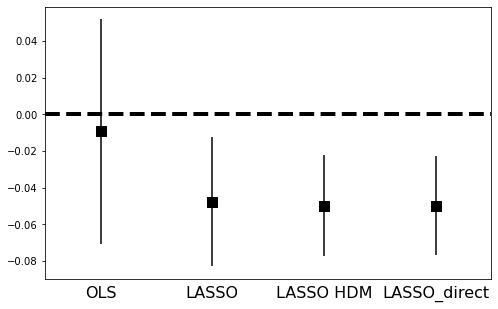

In [109]:
fig, ax = plt.subplots(figsize=(8, 5))
sumary_table.plot(x='varname', y='Estimator', kind='bar', 
             ax=ax, color='none', 
             yerr='err_series', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(sumary_table.shape[0]), 
           marker='s', s=120, 
           y=sumary_table['Estimator'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['OLS','LASSO', 'LASSO HDM','LASSO_direct'], 
                       rotation=0, fontsize=16)


## Neyman Orthogonality Proof